In [ ]:
INTRODUCTION:
Logistic regression is basically a supervised classification algorithm. 
In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X.
Contrary to popular belief, logistic regression IS a regression model. 
The model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. 
Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function.

In [ ]:
Logistic regression becomes a classification technique only when a decision threshold is brought into the picture. 
The setting of the threshold value is a very important aspect of Logistic regression and is dependent on the classification problem itself.

The decision for the value of the threshold value is majorly affected by the values of precision and recall. 
Ideally, we want both precision and recall to be 1, but this seldom is the case. 

In [ ]:
In case of a Precision-Recall tradeoff we use the following arguments to decide upon the thresold:-
1. Low Precision/High Recall:- 
In applications where we want to reduce the number of false negatives without necessarily reducing the number false positives, we choose a decision value which has a low value of Precision or high value of Recall. 
For example, in a cancer diagnosis application, we do not want any affected patient to be classified as not affected without giving much heed to if the patient is being wrongfully diagnosed with cancer. 
This is because, the absence of cancer can be detected by further medical diseases but the presence of the disease cannot be detected in an already rejected candidate.

2. High Precision/Low Recall:- 
In applications where we want to reduce the number of false positives without necessarily reducing the number false negatives, we choose a decision value which has a high value of Precision or low value of Recall. 
For example, if we are classifying customers whether they will react positively or negatively to a personalised advertisement, we want to be absolutely sure that the customer will react positively to the advertisemnt because otherwise, a negative reaction can cause a loss potential sales from the customer.

In [ ]:
Based on the number of categories, Logistic regression can be classified as:-

1. Binomial: Target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc.
2. Multinomial: Target variable can have 3 or more possible types which are not ordered(i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”.
3. Ordinal: It deals with target variables with ordered categories. For example, a test score can be categorized as:“very poor”, “poor”, “good”, “very good”. Here, each category can be given a score like 0, 1, 2, 3.

In [ ]:
Basically, logistic regression doesn’t predict the continuous values. Logistic regression predicts whether something is True or False.

Let’s go through an example. 
Titanic Dataset:- You have more than one feature, and with logistic regression you predict whether they dead or not dead. 
If the value the model predict would be 0.79, that would mean the person is 79% alive, 21% dead.
When the probability is grater or equal than 0.5, binary value is 1, when the probability is less than 0.5, binary value is 0. 
So, the person I just mentioned above will be classify as 1, alive. Model returns 1 (True).

In [ ]:
Logistic regression uses ‘maximum likelihood’ to fit the best line to the data.

In [ ]:
What is maximum likelihood?

Maximum Likelihood Estimation involves treating the problem as an optimization or search problem, where we seek a set of parameters that results in the best fit for the joint probability of the data sample (X).

In [ ]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset # this method will help us to download the Titanic dataset
%matplotlib inline 
plt.style.use('ggplot')

In [ ]:
# Downloading dataset

data = load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data_2 = data.drop(columns, axis=1)

In [ ]:
data_2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
sibsp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Categorizing age column with values between 0 and 80

print(f"Max value of age column : {data_2['age'].max()}")
print(f"Min value of age column : {data_2['age'].min()}")

Max value of age column : 80.0
Min value of age column : 0.42


In [ ]:
# Using Pandas 'cut' method to make the categorization

bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['age'] = pd.cut(data_2['age'], bins = bins, labels=labels)

In [ ]:
pd.DataFrame(data_2['age'].value_counts())

,age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [ ]:
data_2['age'].mode()[0]

'Adult'

In [ ]:
data_3 = data_2.fillna({'age' : data_2['age'].mode()[0]})

In [ ]:
data_2['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
print(f"How many 'S' on embarked column : {data_2[data_2['embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data_2[data_2['embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data_2[data_2['embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


In [ ]:
data_4 = data_2.fillna({'embarked' : 'S'})
data_3[['pclass', 'survived']].groupby(['pclass']).sum().sort_values(by='survived')

,survived
pclass,
2,87
3,119
1,136


In [ ]:
data_3[['sex', 'survived']].groupby(['sex']).sum().sort_values(by='survived')

,survived
sex,
male,109
female,233


In [ ]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_3['fare'] = pd.cut(data_3["fare"], bins = bins, labels = labels)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


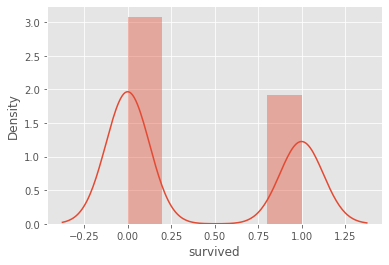

In [ ]:
data_5 = data_3.drop('class', axis=1)
sns.distplot(data_5['survived'])

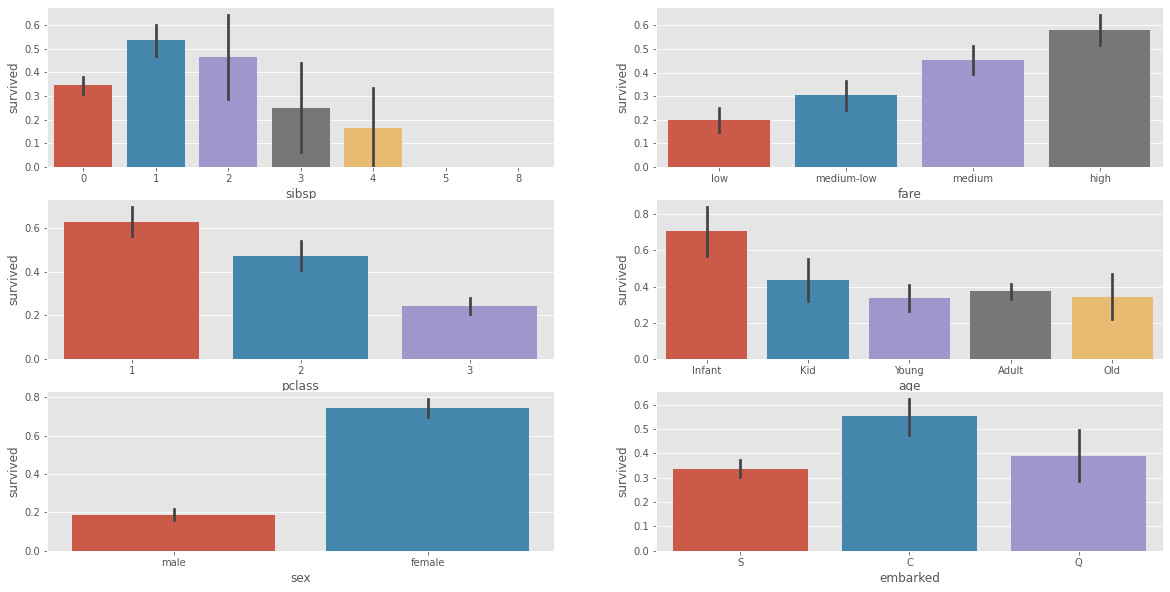

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'sibsp', y = 'survived', data = data_5)
plt.subplot(322)
sns.barplot(x = 'fare', y = 'survived', data = data_5)
plt.subplot(323)
sns.barplot(x = 'pclass', y = 'survived', data = data_5)
plt.subplot(324)
sns.barplot(x = 'age', y = 'survived', data = data_5)
plt.subplot(325)
sns.barplot(x = 'sex', y = 'survived', data = data_5)
plt.subplot(326)
sns.barplot(x = 'embarked', y = 'survived', data = data_5);

In [ ]:
To convert non-numeric values to numeric values, there are two methods:-
1. Label Encoder
2. Pandas get_dummies method

- We are going to use Pandas get_dummies method here to convert non-numeric to numeric data.

In [ ]:
dummies = ['fare', 'age', 'embarked', 'sex']
dummy_data = pd.get_dummies(data_5[dummies])

In [ ]:
dummy_data.shape

(891, 14)

In [ ]:
# Concating the two data frames, and dropping the old columns

data_6 = pd.concat([data_5, dummy_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)

In [ ]:
- We have 891 rows, 14 columns and we are now ready to build our model.

In [ ]:
# Importing necessary libraries for our model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X = data_6.drop('survived', axis = 1)
y = data_6['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
# X contains independent values, y contains dependent value

In [ ]:
# Building the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
# Checking the accuracy score of our model

In [ ]:
accuracy_score(y_pred, y_test)

0.8067796610169492

In [ ]:
confusion_matrix(y_pred, y_test)

array([[158,  31],
       [ 26,  80]])

In [ ]:
# 31 + 26 = 57 wrong prediction